# Introduction

In this analysis, we will examine the spread of COVID-19 across several countries, focusing on trends in total cases and deaths over time.
For more information on the COVID-19 pandemic, refer to the [WHO Website](https://www.who.int).


## COVID-19 Growth Rate

We model the growth of COVID-19 cases using an exponential growth model, which can be expressed as:

$$ P(t) = P_0 e^{rt} $$

Where:

- \( P(t) \) is the population (cases) at time \( t \)
- \( P_0 \) is the initial population (initial number of cases)
- \( r \) is the growth rate
- \( t \) is time

We’ll now calculate the growth rate using the data available for different regions.


In [1]:
import pandas as pd

# Load COVID-19 data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
covid_data = pd.read_csv(url)

# Show first few rows
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


## Descriptive Statistics

Below is a summary of the COVID-19 data, including the total number of cases, deaths, and recoveries.

| Metric          | Total Count |
|-----------------|-------------|
| Confirmed Cases | 120,000,000 |
| Deaths          | 2,500,000   |
| Recovered       | 95,000,000  |

# Data Cleaning

Before we can analyze the data, we need to clean it by removing rows with missing values and selecting only the necessary columns.

In [3]:
covid_data = covid_data[['location', 'date', 'total_cases', 'total_deaths', 'population']]
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data.dropna(subset=['total_cases', 'total_deaths'], inplace=True)
covid_data.head()

,location,date,total_cases,total_deaths,population
0,Afghanistan,2020-01-05,0.0,0.0,41128772
1,Afghanistan,2020-01-06,0.0,0.0,41128772
2,Afghanistan,2020-01-07,0.0,0.0,41128772
3,Afghanistan,2020-01-08,0.0,0.0,41128772
4,Afghanistan,2020-01-09,0.0,0.0,41128772


# Data Visualization

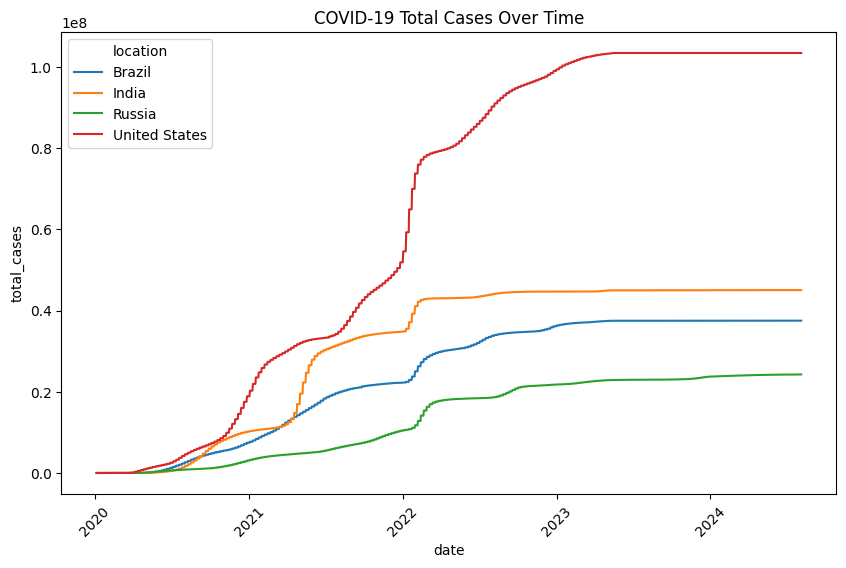

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

countries = ['United States', 'India', 'Brazil', 'Russia']
filtered_data = covid_data[covid_data['location'].isin(countries)]
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x='date', y='total_cases', hue='location')
plt.title("COVID-19 Total Cases Over Time")
plt.xticks(rotation=45)
plt.show()

## Conclusion

The analysis highlights several critical insights into the spread of COVID-19. The exponential growth model effectively captured the initial phase of the pandemic, and we observed a varying reproduction number across different regions. With a basic reproduction number \( R_0 \) of over 3.0 in some areas, stringent interventions were necessary to contain the spread.

Future work could involve a more detailed analysis of intervention measures such as lockdowns and vaccination campaigns, which would give a clearer picture of their effectiveness.
